# **[HW4] Practice_2**
1. Install packages
2. Basis
3. Span
4. Linear combination, change of basis
5. Inverse matrix

ÏÑ†ÌòïÎåÄÏàò Ïã§ÏäµÏùÄ, exercise ÌòπÏùÄ coding Î¨∏Ï†úÌíÄÏù¥Ïóê ÏßëÏ§ëÌïòÍ∏∞ Î≥¥Îã§Îäî, ÏàòÏóÖÏãúÍ∞ÑÏóê Î∞∞Ïõ†Îçò Í∞úÎÖêÎì§ÏùÑ visualize ÌïòÎ©¥ÏÑú Ïù¥Î•º Ìè≠ÎÑìÍ≤å Ïù¥Ìï¥ÌïòÎäî Îç∞Ïóê Ï¥àÏ†êÏùÑ ÎßûÏ∂îÍ≥† ÏûàÏäµÎãàÎã§. Ïã§ÏäµÏóêÏÑú ÏÇ¨Ïö©Ìïú ÏòàÏãú Ïô∏ÏóêÎèÑ, Îã§ÏñëÌïú matrixÎì§ÏùÑ visualize ÌïòÎ©¥ÏÑú Í∞úÎÖêÏùÑ ÏùµÌòÄÎ≥¥ÏãúÍ∏∞ Î∞îÎûçÎãàÎã§.

# 1. Install packages

> ÌïÑÏöîÌïú packageÎ•º ÏÑ§ÏπòÌïòÍ≥† importÌï©ÎãàÎã§

In [1]:
# visualizationÏùÑ ÏúÑÌïú helper codeÏûÖÎãàÎã§.
from urllib.request import urlretrieve
URL = 'https://go.gwu.edu/engcomp4plot'
urlretrieve(URL, 'plot_helper.py')

import sys
sys.path.append('../scripts/')

# Îã§Ïùå ÏÑ∏ custom function (1)plot_vector, (2)plot_linear_transformation, (3) plot_linear_transformations
# ÏùÑ ÏÇ¨Ïö©Ìï† Í≤ÉÏûÖÎãàÎã§.
from plot_helper import *

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import sympy as sy

sy.init_printing() 
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# 2. Basis

> 2Ï∞®Ïõê ($R^2$) Í≥µÍ∞ÑÏóêÏÑúÏùò basisÎ•º ÏÉùÍ∞ÅÌï¥Î¥ÖÏãúÎã§. ÏûÑÏùòÏùò horizontal vector (i.e., $\begin{bmatrix}x\\0\end{bmatrix}$) Îäî $\begin{bmatrix}1\\0\end{bmatrix}$Î•º ÏÉÅÏàòÎ∞∞ Ìï¥ÏÑú ÌëúÌòÑÌï† Ïàò ÏûàÏäµÎãàÎã§. ÏòàÎ•º Îì§Î©¥, vector $\begin{bmatrix} 5 \\ 0 \end{bmatrix}$Îäî $5 * \begin{bmatrix} 1 \\ 0 \end{bmatrix} $ÏúºÎ°ú ÌëúÌòÑÌï† Ïàò ÏûàÏäµÎãàÎã§. ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú, ÏûÑÏùòÏùò vertical vector (i.e., $\begin{bmatrix}0\\y\end{bmatrix}$) Îäî $\begin{bmatrix}0\\1\end{bmatrix}$Î•º ÏÉÅÏàòÎ∞∞ Ìï¥ÏÑú ÌëúÌòÑÌï† Ïàò ÏûàÏäµÎãàÎã§. ÏúÑ $\begin{bmatrix}1\\0\end{bmatrix}, \begin{bmatrix}0\\1\end{bmatrix}$ÏùÑ Í∞ÅÍ∞Å $\mathbf{i}, \mathbf{j}$ÎùºÍ≥† Ìï©ÏãúÎã§.

> $R^2$ Í≥µÍ∞ÑÏóê ÏûàÎäî Î™®Îì† vectorÎì§ÏùÄ horizontal vector + vertical vectorÏùò Ìï©ÏúºÎ°ú ÌëúÌòÑÏù¥ Í∞ÄÎä•ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê (i.e., $[x,y] = [x,0] + [0,y]$), Ïù¥ ÎßêÏùÄ Ï¶â $R^2$Ïóê ÏûàÎäî Î™®Îì† Î≤°ÌÑ∞Îì§ÏùÄ $\mathbf{i}$ÏôÄ $\mathbf{j}$Ïùò linear combinationÏúºÎ°ú ÎÇòÌÉÄÎÇº Ïàò ÏûàÎã§Îäî ÎßêÏù¥ Îê©ÎãàÎã§. Ïù¥Í≤ÉÏù¥ $\mathbf{i}, \mathbf{j}$Ïùò Ïù¥Î¶ÑÏù¥ basis vectorÏù∏ Ïù¥Ïú†ÏûÖÎãàÎã§.

$$
 \left[ \begin{array}{c} 3 \\ 2  \end{array} \right] =
 3\cdot\left[ \begin{array}{c} 1 \\ 0  \end{array} \right] +
 2\cdot\left[ \begin{array}{c} 0 \\ 1  \end{array} \right] =
 3\,\mathbf{i} + 2\,\mathbf{j}
$$

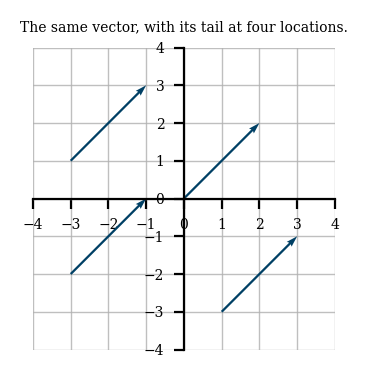

In [3]:
# Note
'''
ÏïÑÎûòÏùò plot_vector() Ìï®ÏàòÎäî Îëê Ïù∏ÏûêÎ•º Î∞õÏäµÎãàÎã§: (1) list of vectors, (2) list of tails (optional)
tailsÎ•º ÏßÄÏ†ïÌïòÏßÄ ÏïäÏùÑ Ïãú ÏûêÏó∞Ïä§ÎüΩÍ≤å tailÏùÄ originÏúºÎ°ú ÏßÄÏ†ïÎê©ÎãàÎã§.
'''
# ÏòàÏãú

vectors = [(2,2)]
tails = [(-3,-2), (-3,1), (0,0), (1,-3)]
plot_vector(vectors, tails)
pyplot.title("The same vector, with its tail at four locations.");

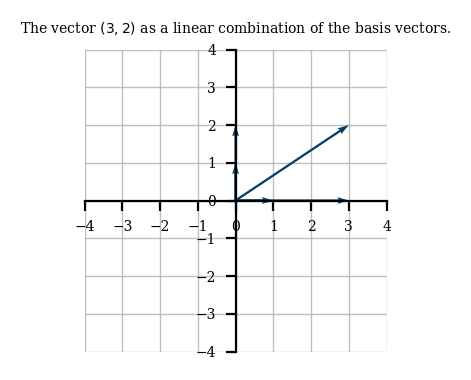

In [4]:
# basis vector
i = np.array((1,0))
j = np.array((0,1))

vec = 3*i + 2*j
vectors = [i, j, 3*i, 2*j, vec]
plot_vector(vectors)  
pyplot.title("The vector $(3,2)$ as a linear combination of the basis vectors.");

> $\begin{bmatrix}3\\2\end{bmatrix}$Í∞Ä $\mathbf{i}$ÏôÄ $\mathbf{j}$Ïùò linear combinationÏúºÎ°ú ÌëúÌòÑÎê®($2*\mathbf{i}+3*\mathbf{j})ÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.

# 3. Span

> $R^2$Ïùò Î™®Îì† vectorÍ∞Ä basisÏùò linear combinationÏúºÎ°ú ÎßåÎì§ Ïàò ÏûàÎã§Îäî ÎßêÏù¥ Î¨¥ÏóáÏùºÍπåÏöî? Ïù¥Îäî $\mathbf{i}, \mathbf{j}$Ïùò spanÏù¥, $R^2$Í∞Ä ÎêúÎã§Îäî ÎßêÏûÖÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥ Î¥ÖÏãúÎã§. NumpyÏùò randint Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ $\mathbf{i}$ÏôÄ $\mathbf{j}$Ïùò linear combination 1000Í∞úÎ•º ÏÉùÏÑ±ÌïòÍ≥†, Ïù¥Î•º Ï†ÑÎ∂Ä plotÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

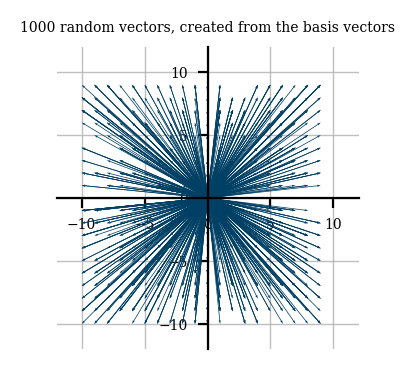

In [5]:
from numpy.random import randint
# span
vectors = []
i = numpy.array((1,0))
j = numpy.array((0,1))

for _ in range(1000):
    m = randint(-10,10)
    n = randint(-10,10)
    vectors.append(m*i + n*j)  # i, j (basis vecor)Ïùò linear combination
    
plot_vector(vectors)
pyplot.title("1000 random vectors, created from the basis vectors");

> ÎßåÏïΩ 1000Í∞úÍ∞Ä ÏïÑÎãå Îçî ÎßéÏùÄ Î≤°ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÎ©¥ ÏÉùÏÑ±Ìï†ÏàòÎ°ù, ÏúÑ $R^2$Í≥µÍ∞ÑÏù¥ ÎçîÏö± ÎπºÍ≥°Ìûà Ï±ÑÏõåÏßà Í≤ÉÏù¥Í≥†, Î¨¥ÌïúÌûà ÎßéÏù¥ ÏÉùÏÑ±Ìï† Í≤ΩÏö∞ Í≤∞Íµ≠ $R^2$Î•º Ï†ÑÎ∂Ä Ï±ÑÏö∏ Ïàò ÏûàÎã§Îäî ÏÇ¨Ïã§ÏùÑ ÏßêÏûëÌï† Ïàò ÏûàÏäµÎãàÎã§ (ÏúÑ plotÏùÄ $\mathbf{i}, \mathbf{j}$Ïùò Í≥ÑÏàòÎ•º 10ÏúºÎ°ú Ï†úÌïúÌïú Í∑∏Î¶ºÏù¥ÎØÄÎ°ú, Ïù¥Î•º Ï†úÌïúÌïòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞Î•º ÏÉÅÏÉÅÌïòÎ©¥ Îê©ÎãàÎã§). Ï¶â, basis vectorÏùò spanÏùÄ whole $R^2$ Í≥µÍ∞ÑÏûÖÎãàÎã§.

> ÎßåÏïΩ $\mathbf{i}, \mathbf{j}$Í∞Ä ÏïÑÎãå $\begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}1\\-3\end{bmatrix}$ÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú ÎòëÍ∞ôÏùÄ Ïã§ÌóòÏùÑ ÌïúÎã§Î©¥ Ïñ¥ÎñªÍ≤å Îê†ÍπåÏöî?

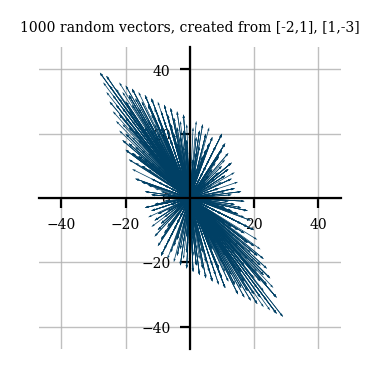

In [6]:
# TODO: 
# span
vectors = []
i = numpy.array((-2,1))
j = numpy.array((1,-3))

for _ in range(1000):
    m = randint(-10,10)
    n = randint(-10,10)
    vectors.append(m*i + n*j)  # i, j (basis vecor)Ïùò linear combination
    
plot_vector(vectors)
pyplot.title("1000 random vectors, created from [-2,1], [1,-3]");

> Í≤∞Î°†Ï†ÅÏúºÎ°ú, Ïö∞Î¶¨Îäî Ïó¨Ï†ÑÌûà, Î¨¥ÏàòÌûà ÎßéÏùÄ $\mathbf{i}, \mathbf{j}$Í∞Ä ÏïÑÎãå $\begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}1\\-3\end{bmatrix}$Ïùò linear combinationÏùÑ plotÌï† Ïãú $R^2$Î•º Ï†ÑÎ∂Ä Ï±ÑÏö∏ Ïàò ÏûàÎã§Îäî ÏÇ¨Ïã§ÏùÑ ÏßêÏûëÌï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥ ÎßêÏùÄ, Ïö∞Î¶¨Îäî basis vectorÎ°ú Î∞òÎìúÏãú $\mathbf{i}, \mathbf{j}$Î•º ÏÇ¨Ïö©Ìï† ÌïÑÏöîÍ∞Ä ÏóÜÎã§Îäî ÎßêÏù¥Í∏∞ÎèÑ Ìï©ÎãàÎã§.

> Í∑∏Îüº basis vectorÎ°ú $\mathbf{i}, \mathbf{j}$Î•º ÏÇ¨Ïö©Ìï† Í≤ΩÏö∞ÏôÄ $\begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}1\\-3\end{bmatrix}$Î•º ÏÇ¨Ïö©Ìï† Í≤ΩÏö∞Îäî Î¨¥ÏóáÏù¥ Îã§Î•ºÍπåÏöî? Î∞îÎ°ú **Í≥ÑÏàò**ÏûÖÎãàÎã§.

$$ \begin{bmatrix} -7 \\ 11 \end{bmatrix} = -7 * \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 11 * \begin{bmatrix} 0 \\ 1 \end{bmatrix} = 2 * \begin{bmatrix} -2 \\ 1 \end{bmatrix} - 3 * \begin{bmatrix} 1 \\ -3 \end{bmatrix} $$

> Ïù¥ Í≥ÑÏàòÎ•º Ï¢åÌëúÎùºÍ≥† ÏÉùÍ∞ÅÌï¥Î≥¥Í≤†ÏäµÎãàÎã§. ÎßåÏïΩ $\mathbf{i}, \mathbf{j}$Î•º basisÎ°ú ÏÇ¨Ïö©Ìï† Í≤ΩÏö∞, Ï¢åÌëúÎäî $(-7, 11)$Ïù¥ Îê©ÎãàÎã§. ÎßåÏïΩ  $\begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}1\\-3\end{bmatrix}$Î•º basisÎ°ú ÏÇ¨Ïö©Ìï† Í≤ΩÏö∞, Ï¢åÌëúÎäî $(2, -3)$Ïù¥ Îê©ÎãàÎã§.

> Îã§Ïãú ÎèåÏïÑÍ∞ÄÏÑú, Ïù¥Î≤àÏóî Îã§Î•∏ Îëê vectorÎ•º spanÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§.  $\begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}-1\\0.5\end{bmatrix}$Ïùò linear combination 1000Í∞úÎ•º ÎßåÎì§Ïñ¥ Î¥ÖÏãúÎã§.



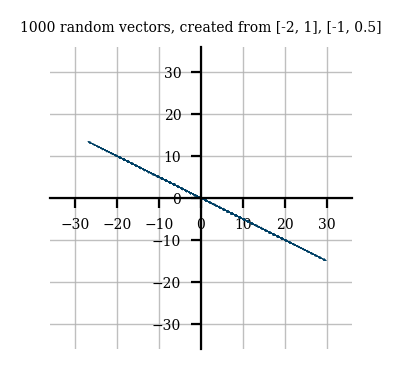

In [7]:
# TODO:
# span
vectors = []
i = numpy.array((-2,1))
j = numpy.array((-1,0.5))

for _ in range(1000):
    m = randint(-10,10)
    n = randint(-10,10)
    vectors.append(m*i + n*j)  # i, j (basis vecor)Ïùò linear combination
    
plot_vector(vectors)
pyplot.title("1000 random vectors, created from [-2, 1], [-1, 0.5]");

> ÏïûÏÑ† Îëê ÏòàÏãúÏôÄÎäî ÏÉÅÌô©Ïù¥ Îã§Î•∏Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§. Îëê Î≤°ÌÑ∞ $\begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}-1\\0.5\end{bmatrix}$Í∞Ä linearly independent ÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê ($\begin{bmatrix}-2\\1\end{bmatrix} = 2 * \begin{bmatrix}-1\\0.5\end{bmatrix}$), Îî∞ÎùºÏÑú Îëê Î≤°ÌÑ∞Ïùò linear combinationÏùÄ $\begin{bmatrix}-2\\1\end{bmatrix}$Ïùò ÏÉÅÏàòÎ∞∞ Î∞ñÏóê ÎÇòÏò¨ Ïàò ÏóÜÏäµÎãàÎã§. Ï¶â, Îëê Î≤°ÌÑ∞Ïùò linear combinationÏúºÎ°† 2Ï∞®Ïõê Í≥µÍ∞ÑÏùÑ Ï†ÑÎ∂Ä Ï±ÑÏö∏ Ïàò ÏóÜÎã§Îäî ÎßêÏù¥Í≥†, Ïù¥ ÎßêÏùÄ $\begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}-1\\0.5\end{bmatrix}$Îäî $R^2$Ïùò basisÍ∞Ä Îê† Ïàò ÏóÜÎã§Îäî ÎßêÍ≥º Í∞ôÏäµÎãàÎã§.

*   **BasisÏùò Ï≤´ Î≤àÏß∏ Ï°∞Í±¥**: BasisÎäî **Ìï¥Îãπ subspace (ÏúÑ ÏòàÏãúÏóêÏÑ† $R^2$)Î•º spanÌï¥Ïïº ÌïúÎã§** (i.e., basisÎ•ºlinear combinationÌï¥ÏÑú Ìï¥Îãπ subspaceÏùò Ïñ¥Îñ§ vectorÎùºÎèÑ ÎßåÎì§ Ïàò ÏûàÏñ¥Ïïº ÌïúÎã§).

>BasisÎäî Ìïú Í∞ÄÏßÄ Ï°∞Í±¥Ïù¥ Îçî ÏûàÎäîÎç∞, Î∞îÎ°ú Î™®Îì† basisÎÅºÎ¶¨Îäî ÏÑúÎ°ú independentÌï¥Ïïº ÌïúÎã§Îäî Í≤ÉÏûÖÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥, $\{ \begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}1\\-3\end{bmatrix} \}$Îäî $R^2$Ïùò basisÏù¥ÏßÄÎßå, $\{ \begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}1\\-3\end{bmatrix}, \begin{bmatrix}-1\\-2\end{bmatrix} \}$Îäî $R^2$Ïùò basisÍ∞Ä ÏïÑÎãôÎãàÎã§. ÏôúÎÉêÌïòÎ©¥, $\begin{bmatrix}-2\\1\end{bmatrix} + \begin{bmatrix}1\\-3\end{bmatrix} = \begin{bmatrix}-1\\2\end{bmatrix}$ , Ï¶â ÏÑ∏ vectorÎäî ÏÑúÎ°ú linearly dependentÌïòÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§. $R^2$ Í≥µÍ∞ÑÏùÑ spanÌïòÎäîÎç∞ Îëê Í∞úÏùò vectorÎßåÏúºÎ°úÎèÑ Ï∂©Î∂ÑÌïúÎç∞, 3Í∞úÏùò vectorÎÇò ÏûàÎäî Í≤ΩÏö∞Ïù∏ Í≤ÉÏûÖÎãàÎã§.

*   **BasisÏùò Îëê Î≤àÏß∏ Ï°∞Í±¥**: BasisÎ•º Ïù¥Î£®Îäî vectorÎì§ÏùÄ **ÏÑúÎ°ú linearly independent** Ìï¥ÏïºÌïúÎã§.

> ÏïÑÎûò ÏòàÏãúÎ•º Î¥ÖÏãúÎã§. ÏïÑÎûò Ï¥àÎ°ùÏÉâ ÌèâÎ©¥ÏùÄ $ \begin{bmatrix}3 \\ 1 \\ 0 \end{bmatrix}$, $ \begin{bmatrix} 2 \\ 0 \\ 1 \end{bmatrix}$ Îëê vectorÎ•º linear combination ÌñàÏùÑ Îïå ÎßåÎì§ Ïàò ÏûàÎäî vectorÎì§Ïùò Í≥µÍ∞Ñ(=subspace)ÏûÖÎãàÎã§. Ïù¥ subspaceÏùò dimensionÏùÄ Î™áÏùºÍπåÏöî? 


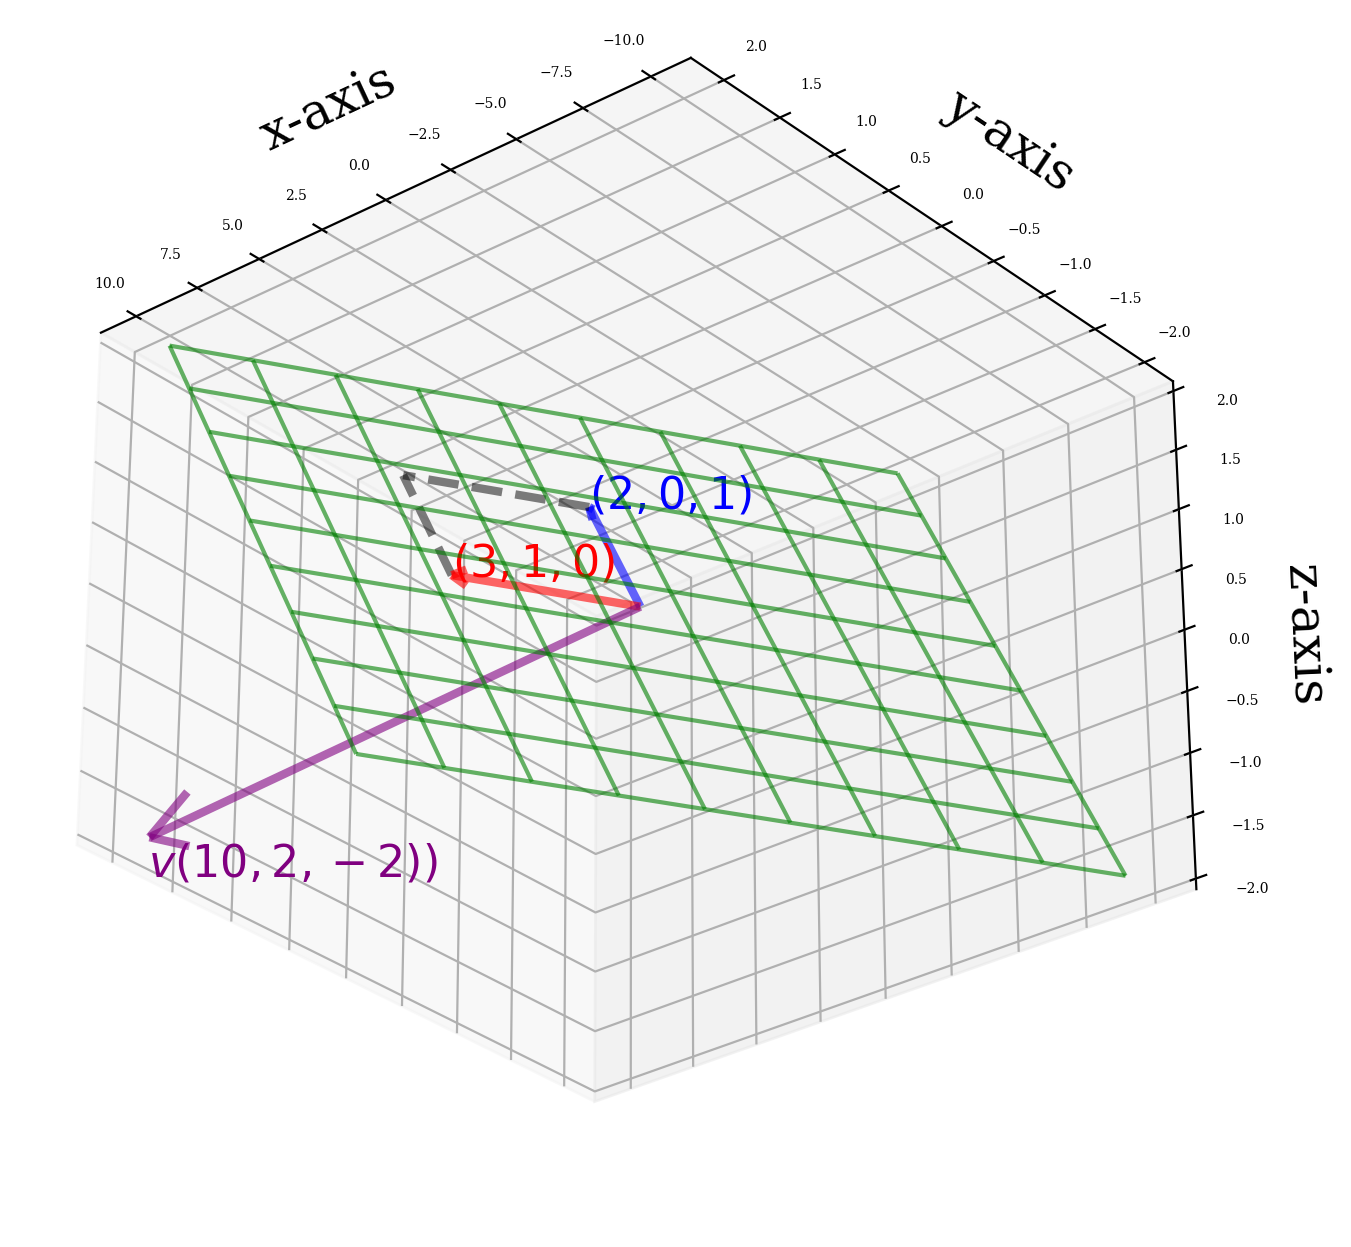

In [8]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')

x2 = np.linspace(-2, 2, 10)
x3 = np.linspace(-2, 2, 10)
X2, X3 = np.meshgrid(x2, x3)
X1 = 3*X2 + 2*X3
ax.plot_wireframe(X1, X2, X3, linewidth = 1.5, color = 'g', alpha = .6)

vec = np.array([[[0, 0, 0, 3, 1, 0]],
               [[0, 0, 0, 2, 0, 1]],
               [[0, 0, 0, 10, 2, -2]]])
colors = ['r', 'b', 'purple']
for i in range(vec.shape[0]):
    X, Y, Z, U, V, W = zip(*vec[i,:,:])
    ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = colors[i],
              arrow_length_ratio = .08, pivot = 'tail',
              linestyles = 'solid',linewidths = 3, alpha = .6)

################################Dashed Line################################

point12 = np.array([[2, 0, 1],[5, 1, 1]])
ax.plot(point12[:,0], point12[:,1], point12[:,2], lw =3, ls = '--', color = 'black', alpha=0.5)

point34 = np.array([[3, 1, 0], [5, 1, 1]])
ax.plot(point34[:,0], point34[:,1], point34[:,2], lw =3, ls = '--', color = 'black', alpha=0.5)

#################################Texts#######################################
ax.text(x = 3, y = 1, z = 0, s='$(3, 1, 0)$', color = 'red', size = 16)
ax.text(x = 2, y = 0, z = 1, s='$(2, 0, 1)$', color = 'blue', size = 16)
ax.text(x = 10, y = 2, z = -2.3, s='$v (10,2,-2))$', color = 'purple', size = 16)

ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.set_zlabel('z-axis', size = 18)

ax.view_init(elev=-29, azim=130)

> Ï†ïÏùòÏóê ÏùòÌï¥, Ï¥àÎ°ù subspaceÏùò dimensionÏùÄ Ï¥àÎ°ù subspaceÏùò basisÏùò Í∞úÏàòÏôÄ Í∞ôÏäµÎãàÎã§. Í∑∏Î†áÎã§Î©¥ Ï¥àÎ°ù subspaceÏùò basis Í∞úÏàòÎäî Î™áÏùºÍπåÏöî?

> Ïù¥Î•º ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ÏÑ† $ \begin{bmatrix}3 \\ 1 \\ 0 \end{bmatrix}$, $ \begin{bmatrix} 2 \\ 0 \\ 1 \end{bmatrix}$ Îëê vectorÍ∞Ä linearly independentÌïúÏßÄÎßå ÌôïÏù∏ÌïòÎ©¥ Îê©ÎãàÎã§. ÏôúÎÉêÌïòÎ©¥ basisÏùò Ï≤´ Î≤àÏß∏ Ï°∞Í±¥ÏùÄ Ïù¥ÎØ∏ ÎßåÏ°±ÌïòÍ≥† ÏûàÏúºÎØÄÎ°ú (Ïï†Ï¥àÏóê Ï†Ä ÎëòÏùÑ spanÌï¥ÏÑú ÎßåÎì†Í≤å Ï¥àÎ°ùÏÉâ subspace), Îëê Î≤àÏß∏ Ï°∞Í±¥Ïù∏ linearly independent Ïó¨Î∂ÄÎßå ÌôïÏù∏ÌïòÎ©¥ Îê©ÎãàÎã§.

> ÎßåÏïΩ linearly dependentÌïòÎã§Î©¥ Ïñ¥ÎñªÍ≤å Îê†ÍπåÏöî (i.e., $ \begin{bmatrix}3 \\ 1 \\ 0 \end{bmatrix} = c * \begin{bmatrix} 2 \\ 0 \\ 1 \end{bmatrix}$) ? Í∑∏Îü¥ Í≤ΩÏö∞, $ \begin{bmatrix}3 \\ 1 \\ 0 \end{bmatrix}$Í∞Ä spanÌïòÎäî Í≥µÍ∞Ñ(1-dimension)Í≥º $ \begin{bmatrix}2 \\ 0 \\ 1 \end{bmatrix}$Ïù¥ spanÌïòÎäî Í≥µÍ∞Ñ(1-dimension)Ïù¥ ÎèôÏùºÌïòÍ∏∞ ÎïåÎ¨∏Ïóê, ÏµúÏ¢Ö dimensionÎèÑ 1Ï∞®ÏõêÏù¥ Îê©ÎãàÎã§. ÎßåÏïΩ ÎëòÏù¥ linearly independent ÌïòÎã§Î©¥, Îß® ÏúÑ ÏòàÏãúÏùò $\{\mathbf{i},  \mathbf{j}\}$, ÌòπÏùÄ $\{\mathbf{a},  \mathbf{b}\}$ Ï≤òÎüº ÎëòÏùÑ spanÌïú subspaceÎèÑ 2Ï∞®ÏõêÏù¥ Îê† Í≤ÉÏûÖÎãàÎã§. 

> ÏúÑ Îëê Î≤°ÌÑ∞Ïùò linear independence Ïó¨Î∂ÄÎ•º ÌôïÏù∏Ìï¥Î¥ÖÏãúÎã§. numpyÏùò matrix_rank Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÎ©¥ Ïù¥Î•º ÏâΩÍ≤å Íµ¨Ìï† Ïàò ÏûàÏäµÎãàÎã§. Í∞ïÏùòÏóêÏÑú Î∞∞Ïõ†ÎìØ, matrix $A$ Ïùò rankÎäî $A$Ïùò column spaceÏùò dimensionÏûÖÎãàÎã§. Îî∞ÎùºÏÑú, $A = \begin{bmatrix} 3 & 2 \\ 1 & 0 \\ 0 & 1 \end{bmatrix}  $ÏôÄ Í∞ôÏù¥ ÏÑ§Ï†ïÌïòÍ≥† AÏùò rankÎ•º Íµ¨ÌïòÎ©¥, Îëê Î≤°ÌÑ∞Ïùò linear independence Ïó¨Î∂ÄÎ•º Ïïå Ïàò ÏûàÏäµÎãàÎã§ (rankÍ∞Ä 1Ïù¥ÎùºÎ©¥ Îëê column vectorÍ∞Ä spanÌïòÎäî Í≥µÍ∞ÑÏù¥ 1Ï∞®Ïõê, rankÍ∞Ä 2ÎùºÎ©¥ Îëê column vectorÍ∞Ä spanÌïòÎäî Í≥µÍ∞ÑÏù¥ 2Ï∞®Ïõê).

In [9]:
A = np.array([[3,2],[1,0],[0,1]])
np.linalg.matrix_rank(A)

2

> AÏùò rankÍ∞Ä 2Ïù¥ÎØÄÎ°ú, Îëê vectorÎäî ÏÑúÎ°ú linearly independentÌï®ÏùÑ Ïïå Ïàò ÏûàÍ≥†, Îî∞ÎùºÏÑú Îëê vectorÎäî basisÏùò Îëê Ï°∞Í±¥ÏùÑ Î™®Îëê ÎßåÏ°±ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ï¥àÎ°ùÏÉâ subspaceÏùò basisÍ∞Ä Îê©ÎãàÎã§. Í≤∞Î°†Ï†ÅÏúºÎ°ú, Ï¥àÎ°ù subspaceÎäî Ï†ÑÏ≤¥ $R^3$ Í≥µÍ∞Ñ ÏïàÏóê ÏÜçÌï¥ÏûàÎäî, 2 dimensionÏùò subspace (i.e., 2Ï∞®Ïõê ÌèâÎ©¥)Í∞Ä Îê©ÎãàÎã§.

> ÏúÑ Í∑∏Î¶ºÏùò v = $\begin{bmatrix} 10 \\ 2 \\ -2 \end{bmatrix}$ Î•º Î≥¥Î©¥, Ï¥àÎ°ùÏÉâ subspace Î∞îÍπ•Ïóê ÏúÑÏπòÌï®ÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Îäî Î¨¥ÏóáÏùÑ ÎúªÌï†ÍπåÏöî?

> Ïû†Ïãú Practice_1 Ïã§ÏäµÏúºÎ°ú ÎÇ¥Ïö©ÏúºÎ°ú ÎèåÏïÑÍ∞ÄÏÑú, $Ax = b$Ïùò Ìï¥Î•º Ï∞æÎäî Î¨∏Ï†úÎ•º Îã§Ïãú ÏÉùÍ∞ÅÌï¥Î¥ÖÏãúÎã§. Column pictureÏùò ÏûÖÏû•ÏóêÏÑú, Ïù¥Îäî AÏùò Í∞Å columnÏùò Í≥ÑÏàòÎ•º Ï∞æÎäî Î¨∏Ï†úÏôÄ Í∞ôÏïòÏäµÎãàÎã§.

$$ Ax = b \\
\begin{bmatrix} 3 & 2 \\ 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix} \\
x_1\begin{bmatrix} 3  \\ 1  \\ 0  \end{bmatrix} + x_2\begin{bmatrix} 2 \\ 0 \\ 1 \end{bmatrix} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix} 
$$

> Practice_1Í≥º Ïó∞Í¥ÄÏßÄÏñ¥Î≥¥Î©¥, Ïù¥Îü¨Ìïú ÌñâÎ†¨ $A$Îäî Ïñ¥Îñ†Ìïú input $x_1, x_2$Î•º ÎÑ£ÎçîÎùºÎèÑ, Ï¥àÎ°ùÏÉâ subspace ÏúÑÏóê ÏûàÏßÄ ÏïäÏùÄ Îã§Î•∏ vector (ÏòàÎ•ºÎì§Î©¥ ÏúÑ Í∑∏Î¶ºÏùò Î≥¥ÎùºÏÉâ $v$)Î•º Ï†àÎåÄ outputÏúºÎ°ú ÎÇº Ïàò ÏóÜÎã§Îäî ÏÇ¨Ïã§ÏùÑ ÎúªÌï©ÎãàÎã§. Ïù¥Î•º Îã§Ïãú ÎßêÌïòÎ©¥, bÍ∞Ä $A$Ïùò column space(=Ï¥àÎ°ùÏÉâ subspace) ÏúÑÏóê Ï°¥Ïû¨Ìï¥ÏïºÎßå $Ax=b$Ïùò Ìï¥Í∞Ä Ï°¥Ïû¨ÌïúÎã§Îäî ÎßêÏù¥ Îê©ÎãàÎã§. Îî∞ÎùºÏÑú $Ax=v$Ïùò Ìï¥Îäî Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.

In [11]:
from sympy.solvers.solveset import linsolve

x1, x2 = sy.symbols('x1 x2')
A = sy.Matrix(((3,2),(1,0),(0,1)))
b = sy.Matrix((10,2,-2))
system = A,b
linsolve(system, x1, x2)

# 4. Linear transformation, Change of basis

> ÏúÑÏùò SpanÏóêÏÑú ÏÇ¨Ïö©Ìïú ÏòàÏãúÎ•º Îã§Ïãú Í∞ÄÏ†∏ÏôÄÎ¥ÖÏãúÎã§.

$$ \begin{bmatrix} -7 \\ 11 \end{bmatrix} = -7 * \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 11 * \begin{bmatrix} 0 \\ 1 \end{bmatrix} = 2 * \begin{bmatrix} -2 \\ 1 \end{bmatrix} - 3 * \begin{bmatrix} 1 \\ -3 \end{bmatrix} $$

>  $\begin{bmatrix} -2 \\ 1 \end{bmatrix}, \begin{bmatrix} 1 \\ -3 \end{bmatrix}$Î•º Í∞ÅÍ∞Å $\mathbf{a}, \mathbf{b}$Î°ú ÌëúÌòÑÌïòÍ≤†ÏäµÎãàÎã§. ÎßåÏïΩ $\{\mathbf{a}, \mathbf{b}\}$Î•º basisÎ°ú ÏÇ¨Ïö©Ìï† Í≤ΩÏö∞, $\begin{bmatrix} -7 \\ 11 \end{bmatrix}$ÏùÄ Ïù¥ basisÏùò Í≥ÑÏàòÍ∞Ä $(2, -3)$Ïù∏ Í≤ΩÏö∞Î°ú ÌëúÌòÑÌï† Ïàò ÏûàÏäµÎãàÎã§. ÎßåÏïΩ $\{\mathbf{i}, \mathbf{j}\}$Î•º basisÎ°ú ÏÇ¨Ïö©Ìï† Í≤ΩÏö∞,  $\begin{bmatrix} -7 \\ 11 \end{bmatrix}$ÏùÄ Ïù¥ basisÏùò Í≥ÑÏàòÍ∞Ä $(-7, 11)$Ïù∏ Í≤ΩÏö∞Î°ú ÌëúÌòÑÌï† Ïàò ÏûàÏäµÎãàÎã§ (Îã§Î•∏ ÎßêÎ°ú ÌïòÎ©¥, Ïù¥ 'Í≥ÑÏàò'Îäî Ìï¥Îãπ basisÏóêÏÑúÏùò 'Ï¢åÌëú'ÎùºÍ≥† Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥ÌõÑ Ïö©Ïñ¥Îäî 'Ï¢åÌëú'Î°ú ÌÜµÏùºÌïòÍ≤†ÏäµÎãàÎã§). $\begin{bmatrix} 2 \\ -3  \end{bmatrix}$,  $\begin{bmatrix} -7 \\ 11  \end{bmatrix}$ÏùÑ Í∞ÅÍ∞Å $\mathbf{c}, \mathbf{c'}$ÎùºÍ≥† ÌïòÍ≤†ÏäµÎãàÎã§.

<h3 align="center">

$\boldsymbol{\cdot}$   $\begin{bmatrix} -7 \\ 11 \end{bmatrix}$ÏùÄ basis $\{\mathbf{a}, \mathbf{b}\}$ ÏóêÏÑú Ï¢åÌëú $\mathbf{c} (=\begin{bmatrix} 2 \\ -3  \end{bmatrix})$ ÏúºÎ°ú ÌëúÌòÑÎêúÎã§. \\
$\boldsymbol{\cdot}$   $\begin{bmatrix} -7 \\ 11 \end{bmatrix}$ÏùÄ basis $\{\mathbf{i}, \mathbf{j}\}$ ÏóêÏÑú Ï¢åÌëú $\mathbf{c'} (=\begin{bmatrix} -7 \\ 11  \end{bmatrix})$ ÏúºÎ°ú ÌëúÌòÑÎêúÎã§.
</h3>

>Îß® ÏúÑÏùò ÏãùÏùÑ Îã§Ïãú Ï†ïÎ¶¨Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

$$
  \left[ \begin{array}{c} -7 \\ 11  \end{array} \right] = 
   \begin{bmatrix} -2 & 1 \\ 
                    1 & -3  \end{bmatrix}  
   \left[ \begin{array}{c} 2 \\ -3  \end{array} \right] \\
   \mathbf{c'} = A\mathbf{c}
$$

> Ï¶â **[1] matrix $A= \begin{bmatrix} -2 & 1 \\ 1 & -3  \end{bmatrix}$Ïóê  basis $\{\mathbf{a}, \mathbf{b}\}$Ïùò Ï¢åÌëú $\mathbf{c}$ÏùÑ Í≥±ÌïòÎ©¥, basis $\{\mathbf{i}, \mathbf{j}\}$Ïùò Ï¢åÌëú $\mathbf{c'}$ÏùÑ ÏñªÏùÑ Ïàò ÏûàÏùå**ÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Ïóê ÎåÄÌï¥ Ï¢ÄÎçî ÏûêÏÑ∏ ÏïåÏïÑÎ¥ÖÏãúÎã§.




In [12]:
A = np.array([[-2,1],[1,-3]])
c = np.array([2,-3])
c_ = np.array([-7,11])

A

array([[-2,  1],
       [ 1, -3]])

In [13]:
A@c

array([-7, 11])

> ÏúÑÏóêÏÑú Î≥¥Ïù∏ Í≤ÉÏ≤òÎüº, $A$ÏôÄ $c$Î•º ÎÇ¥Ï†ÅÌïòÎ©¥ $\mathbf{c'}$Í∞Ä ÎÇòÏò§Í≤å Îê©ÎãàÎã§. Ïù¥Ï†ú $A$Ïóê $\mathbf{i}, \mathbf{j}$Î•º Í∞ÅÍ∞Å Í≥±Ìï¥Î¥ÖÏãúÎã§.

In [14]:
i = np.array([1,0])
j = np.array([0,1])
A@i

array([-2,  1])

In [15]:
A@j

array([ 1, -3])

> **[2] Matrix $A= \begin{bmatrix} -2 & 1 \\ 1 & -3  \end{bmatrix}$Ïóê $\mathbf{i}$Î•º Í≥±ÌñàÏùÑ Í≤ΩÏö∞ $\mathbf{a}$Í∞Ä ÎÇòÏò§Í≥†, $\mathbf{j}$Î•º Í≥±ÌñàÏùÑ Í≤ΩÏö∞ $\mathbf{b}$Í∞Ä ÎÇòÏò¥**ÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§. \\
Custom helper functionÏù∏ *plot_linear_transformation()* ÏùÑ Ïù¥Ïö©Ìï¥ÏÑú ÏúÑ ÎÇ¥Ïö©Îì§ÏùÑ visualize Ìï¥Î¥ÖÏãúÎã§.

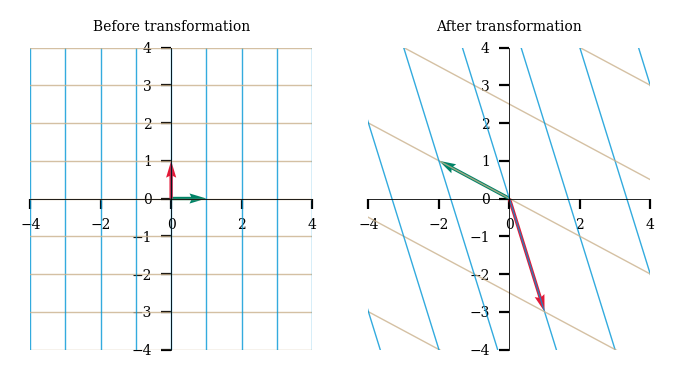

In [16]:
plot_linear_transformation(A)

> ÏúÑ Í∑∏Î¶ºÏóêÏÑú Ïïå Ïàò ÏûàÎìØ, linear transformationÏùÄ ÏõêÏ†ê (0,0)ÏùÄ Í∑∏ ÏûêÎ¶¨Ïóê Îëî Ï±Ñ, ÏßÅÏÑ†Îì§(Ï¢åÏ∏° Í∑∏Î¶º)ÏùÑ Îã§Î•∏ ÏßÅÏÑ†Îì§(Ïö∞Ï∏° Í∑∏Î¶º)ÏúºÎ°ú transform ÌïúÎã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§. $A$Ïóê $\mathbf{i}$ (Ï¢åÏ∏° Í∑∏Î¶ºÏùò Ï¥àÎ°ùÏÉâ vector)Î•º Í≥±ÌñàÏùÑ Í≤ΩÏö∞ $\mathbf{a}$ (Ïö∞Ï∏° Í∑∏Î¶ºÏùò Ï¥àÎ°ùÏÉâ vector)Í∞Ä ÎÇòÏò§Í≥†, $\mathbf{j}$ (Ï¢åÏ∏° Í∑∏Î¶ºÏùò Îπ®Í∞ÑÏÉâ vector)Î•º Í≥±ÌñàÏùÑ Í≤ΩÏö∞ $\mathbf{b}$ (Ïö∞Ï∏° Í∑∏Î¶ºÏùò Îπ®Í∞ÑÏÉâ vector)Í∞Ä ÎÇòÏò¥ÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§ (ÏúÑÏùò **[2]**).

### Exercise

> Îã§ÏùåÍ≥º Í∞ôÏùÄ 2x2 matrixÎ•º Í∞ÅÍ∞Å ÎßåÎì§Í≥†, Ïù¥Î•º plot_linear_transformationÏùÑ Ïù¥Ïö©Ìï¥ visualize Ìï¥Î≥¥ÏãúÏò§

* matrix $A$ : $R^2$Ïùò vectorÎ•º ÏãúÍ≥ÑÎ∞©Ìñ•ÏúºÎ°ú 90ÎèÑ ÌöåÏ†ÑÌïúÎã§.
* matrix $B$ : $R^2$Ïùò vectorÏóê ÎåÄÌï¥ $[x,y] \rightarrow [x+y, y]$ Î•º ÌïúÎã§.
* matrix $C$ : $R^2$Ïùò vectorÏóê ÎåÄÌï¥ (i) AÎ•º Ìïú ÌõÑ (ii) BÎ•º ÌïúÎã§.
* matrix $D$ : $R^2$Ïùò vectorÏóê ÎåÄÌï¥ (i) BÎ•º Ìïú ÌõÑ (ii) AÎ•º ÌïúÎã§.

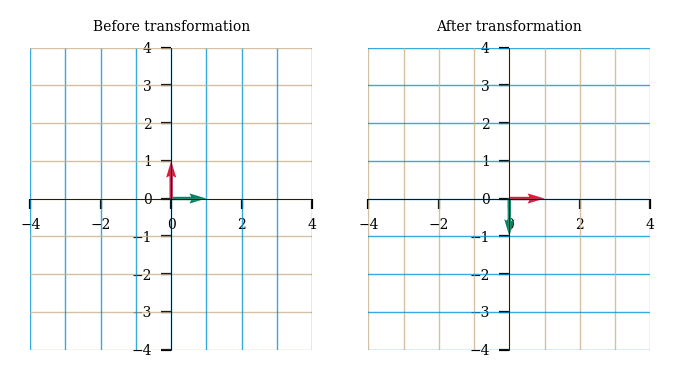

In [24]:
# A
A = np.array([[0,1],[-1,0]])
plot_linear_transformation(A)

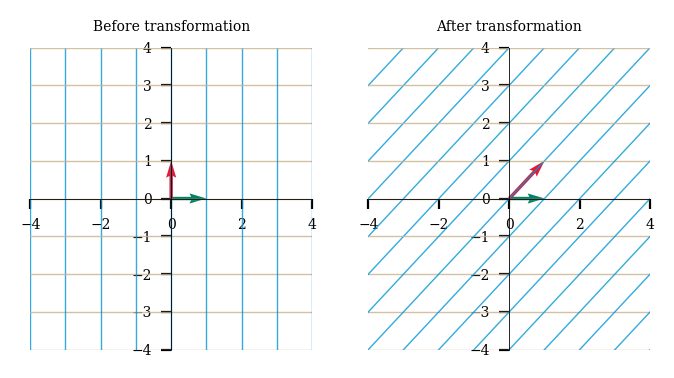

In [25]:
# B
B = np.array([[1,1],[0,1]])
plot_linear_transformation(B)

[[-1  1]
 [-1  0]]


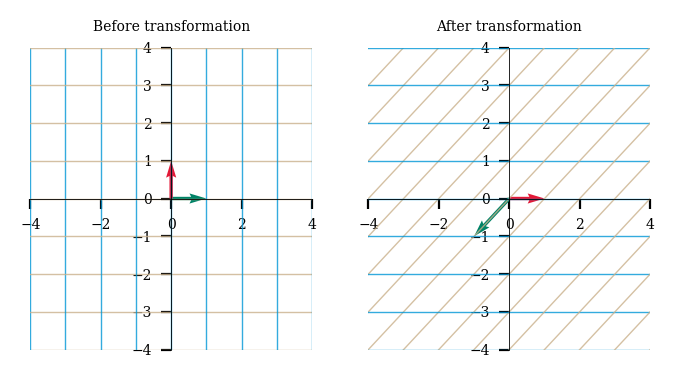

In [27]:
# C
C = B@A
print(C)
plot_linear_transformation(C)

[[ 0  1]
 [-1 -1]]


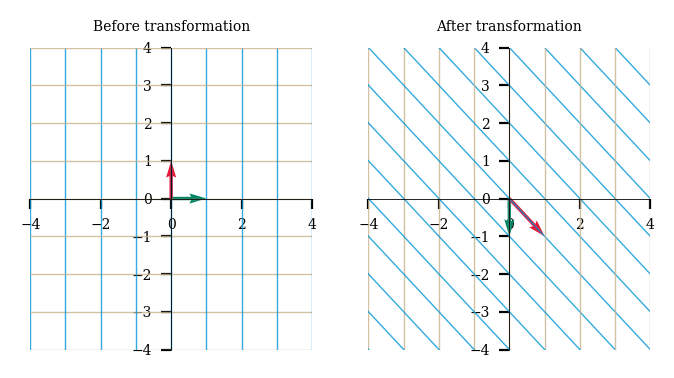

In [28]:
# D
D = A@B
print(D)
plot_linear_transformation(D)

> Îã§Î•∏ ÏòàÏãúÎ•º Îì§Ïñ¥Î¥ÖÏãúÎã§.

$$ M = \begin{bmatrix} 1 & 2 \\  2  & 1 \end{bmatrix} $$

> Ï≤´ Î≤àÏß∏ column vectorÎäî $\mathbf{i}$Í∞Ä transformÎêòÎäî vectorÍ∞Ä ÎêòÍ≥†, Îëê Î≤àÏß∏ column vectorÎäî $\mathbf{j}$Í∞Ä transformÎêòÎäî vectorÍ∞Ä Îê©ÎãàÎã§ (ÏúÑÏùò **[2]**).

$$
\mathbf{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 1 \\ 2 \end{bmatrix} \\
\mathbf{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 2 \\ 1 \end{bmatrix}
$$

> Ïñ¥Îñ§ ÏûÑÏùòÏùò vector $\mathbf{x} = \left[ \begin{array}{c} x \\ y  \end{array} \right] = x \mathbf{i} + y \mathbf{j}$Îäî, Îã§ÏùåÍ≥º Í∞ôÏù¥ transform Îê† Í≤ÉÏûÖÎãàÎã§.

$$
T(x) = T(\begin{bmatrix}x\\y\end{bmatrix})=T\Big(\begin{bmatrix}x\\0\end{bmatrix}\Big)+T\Big(\begin{bmatrix}0\\y\end{bmatrix}\Big) = T\Big(x\begin{bmatrix}1\\0\end{bmatrix}\Big)+T\Big(y\begin{bmatrix}0\\1\end{bmatrix}\Big) = x\begin{bmatrix}1\\2\end{bmatrix} + y\begin{bmatrix}2\\1\end{bmatrix}
$$

In [29]:
M = np.array([[1,2], [2,1]])
M@i

array([1, 2])

In [30]:
M@j

array([2, 1])

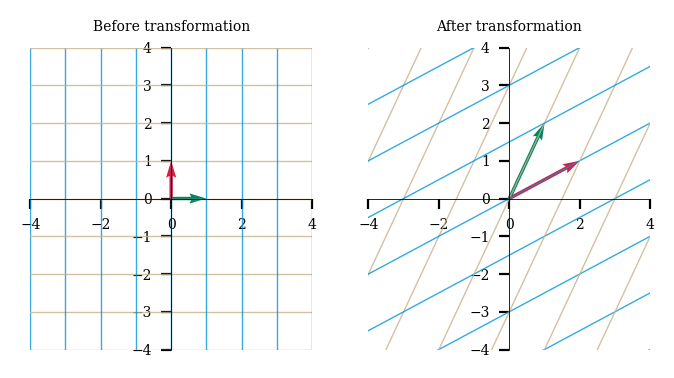

In [31]:
plot_linear_transformation(M)

> Ïù¥ transformation $M$Ïù¥ ÌäπÏ†ïÌïú vector (e.g., $\begin{bmatrix} 0.5 \\ 1 \end{bmatrix}$)Î•º Ïñ¥ÎñªÍ≤å transform ÏãúÌÇ§ÎäîÏßÄ Î≥¥Í∏∞ ÏúÑÌï¥ÏÑú, plot_vector() Ìï®ÏàòÎ•º ÌôúÏö©Ìï¥ÏÑú visualize Ìï¥Î¥ÖÏãúÎã§.

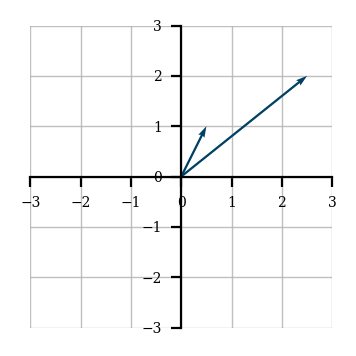

In [32]:
x = np.array((0.5,1))

vectors = [x, M.dot(x)]  
plot_vector(vectors)

> Ïù¥Ï†ú linear transformationÏùò Îß® ÏúÑÏóêÏÑú ÏÇ¨Ïö©ÌñàÎçò $A$(=$\,\begin{bmatrix} -2 & 1 \\  1 &-3  \end{bmatrix} $ )Î•º Îã§Ïãú Í∞ÄÏ†∏Ïò§Í≤†ÏäµÎãàÎã§. Ïù¥ $A$Îäî $R^2$Ïóê Ï°¥Ïû¨ÌïòÎäî ÏûÑÏùòÏùò vector $\mathbf{x} = \left[ \begin{array}{c} x \\ y  \end{array} \right]$ Î•º 

$$
  x \left[ \begin{array}{c} -2 \\ 1  \end{array} \right] + 
  y \left[ \begin{array}{c} 1 \\ -3  \end{array} \right]
$$

> Î°ú transform Ìï©ÎãàÎã§. x=2, y=-3ÏùÑ ÎåÄÏûÖÌïúÎã§Î©¥ ÏïÑÎûòÏôÄ Í∞ôÏù¥ Îê©ÎãàÎã§.

$$
\mathbf{c'} = A\mathbf{c}
\\
  \left[ \begin{array}{c} -7 \\ 11  \end{array} \right] = 
   \begin{bmatrix} -2 & 1 \\ 
                    1 & -3  \end{bmatrix}  
   \left[ \begin{array}{c} 2 \\ -3  \end{array} \right] 
$$

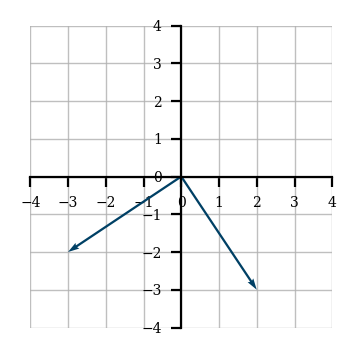

In [33]:
x = numpy.array((2,-3))
vectors = [x, A.dot(x)]
plot_vector(vectors)  # (2,3) -> (-7,11)

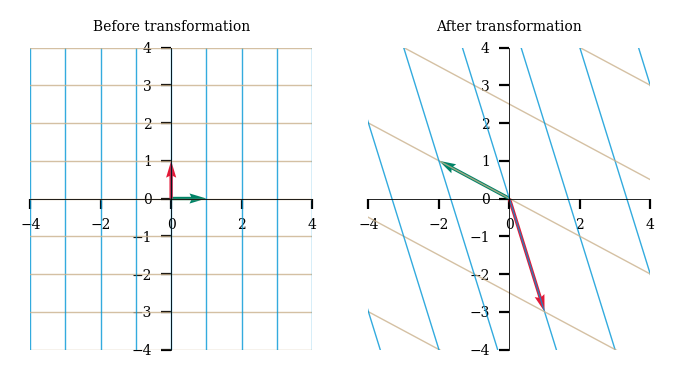

In [34]:
A = np.array([[-2,1],[1,-3]])
plot_linear_transformation(np.array(A, dtype=float))  # (1,0) -> (-2,1), (0,1) -> (1,-3)

> Ï¶â, ÏúÑ ÎÇ¥Ïö©ÏùÑ ÌÜµÌãÄÏñ¥ Ïù¥Î•º Ìï¥ÏÑùÌïúÎã§Î©¥, $A$(=$\,\begin{bmatrix} -2 & 1 \\  1 &-3  \end{bmatrix} $ )ÎùºÎäî matrixÎäî, **linear transformationÏôÄÎäî Îã§Î•∏ Í¥ÄÏ†êÏúºÎ°ú Î∞îÎùºÎ≥∏Îã§Î©¥**, basis $\{ \mathbf{a}, \mathbf{b}  \}$Î•º basis $\{ \mathbf{i}, \mathbf{j}  \}$Î°ú Î∞îÍæ∏Îäî matrixÍ∞Ä Îê©ÎãàÎã§ (Í∑∏ÎûòÏÑú *Í∞ôÏùÄ* vectorÍ∞Ä  basis $\{ \mathbf{a}, \mathbf{b}  \}$ÏóêÏÑúÎäî Ï¢åÌëú (2,-3)ÏúºÎ°ú ÌëúÌòÑÎêòÍ≥†, basis $\{ \mathbf{i}, \mathbf{j}  \}$ÏóêÏÑúÎäî Ï¢åÌëú (-7,11)Î°ú ÌëúÌòÑÎê®). Îî∞ÎùºÏÑú, Ïù¥Îü¨Ìïú Í¥ÄÏ†êÏúºÎ°ú Î≥∏Îã§Î©¥, "Before transformation"Ïùò plotÏùÄ basisÍ∞Ä $\{ \mathbf{a}, \mathbf{b}  \}$Ïù∏ ÏÉÅÌô©Ïù¥Í≥†, "After transformation"Ïùò plotÏùÄ basisÎ•º $\{ \mathbf{a}, \mathbf{b}  \}$ÏóêÏÑú  $\{ \mathbf{i}, \mathbf{j}  \}$Î°ú Î∞îÍøîÏ§Ä ÏÉÅÌô©Ïù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Îäî "Before transformation"Ïùò (2,-3)Ïù¥ "After transformation"Ïùò (-7,11)Î°ú ÏòÆÍ≤®ÏßÄÎäî Í≤ÉÍ≥º ÎßûÎãøÏïÑ ÏûàÏäµÎãàÎã§. Ïù¥Î•º change of basisÎùº ÌïòÍ≥†, Îã§Ïùå Ïã§Ïäµ Î∞è eigen decomposition Í∞ïÏùòÏóêÏÑú Îçî Î∞∞Ïö∞Í≤å Îê† Í≤ÉÏûÖÎãàÎã§.

> Square matrix $A:R^{n\times n}$Î•º Î∞îÎùºÎ≥¥Îäî 2Í∞ÄÏßÄ Î∞©Î≤ï

* linear transformation: basisÎ•º fixÏãúÏºúÎÜìÍ≥†, Ìï¥Îãπ basisÏóêÏÑú vector $x_1$Í∞Ä vector $x_2$Î°ú linearly transform ÎêòÎäî Í≤ÉÏùÑ ÌñâÎ†¨ $A$Î°ú ÌëúÌòÑÌï¥Î≥¥Ïûê (two different vectors in the same basis) . 
* change of basis: Í∞ôÏùÄ vector $x$Îäî basisÎ•º Ïñ¥ÎñªÍ≤å Ïû°ÎÉêÏóê Îî∞Îùº Ï¢åÌëúÍ∞Ä Îã¨ÎùºÏßÑÎã§. Vector $x$Î•º Í≥†Ï†ïÏãúÌÇ§Í≥†, basis $\mathcal{A}$Î•º basis $\mathcal{B}$Î°ú Î∞îÍæ∏Îäî matrix AÎ•º Ï∞æÏïÑÎ≥¥Ïûê (same vector in two different bases).

> (Ï£ºÏùò: change of basisÏôÄÏùò Ï∞®Ïù¥Î•º Í∞ïÏ°∞ÌïòÍ∏∞ ÏúÑÌï¥ linear transformationÏùÄ basisÍ∞Ä Í≥†Ï†ïÎêòÏñ¥ ÏûàÎäî ÏÉÅÌÉúÎùºÍ≥† ÌñàÏúºÎÇò, ÏÇ¨Ïã§ basisÎ•º Í≥†Ï†ïÏãúÌÇ§ÏßÄ ÏïäÏïÑÎèÑ Îê©ÎãàÎã§. ÏòàÎ•º Îì§Î©¥ Í∞ïÏùòÏóêÏÑúÏùò ÏòàÏ†úÏ≤òÎüº $R^2 \rightarrow R^3$Ïùò transformationÏùò Í≤ΩÏö∞ Ïï†Ï¥àÏóê inputÍ≥º outputÏùò basisÍ∞Ä Í∞ôÏùÑ Ïàò ÏóÜÎäî Í≤ÉÏóêÏÑú Ïïå Ïàò ÏûàÏäµÎãàÎã§ (ÌïòÎÇòÎäî 2Ï∞®Ïõê, ÌïòÎÇòÎäî 3Ï∞®Ïõê vector))

> Change of basisÎäî ÏïÑÏßÅ Í∞ïÏùòÏóêÏÑú Îã§Î£®ÏßÄ ÏïäÏùÄ ÎÇ¥Ïö©Ïù∏Îç∞, Ï§ëÏöîÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ïã§ÏäµÏóêÏÑú Î®ºÏ†Ä ÏßÑÌñâÌñàÏäµÎãàÎã§. ÎÇ¥Ïùº Ïã§ÏäµÏóêÏÑú Îçî ÏûêÏÑ∏Ìûà ÏïåÏïÑÎ≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

# 5. Inverse matrix

Ïñ¥Ï†ú Î∞∞Ïö¥ inverse matrixÎ•º linear transformationÏùò ÏûÖÏû•ÏóêÏÑú Î≥¥ÎèÑÎ°ù Ìï©ÏãúÎã§.

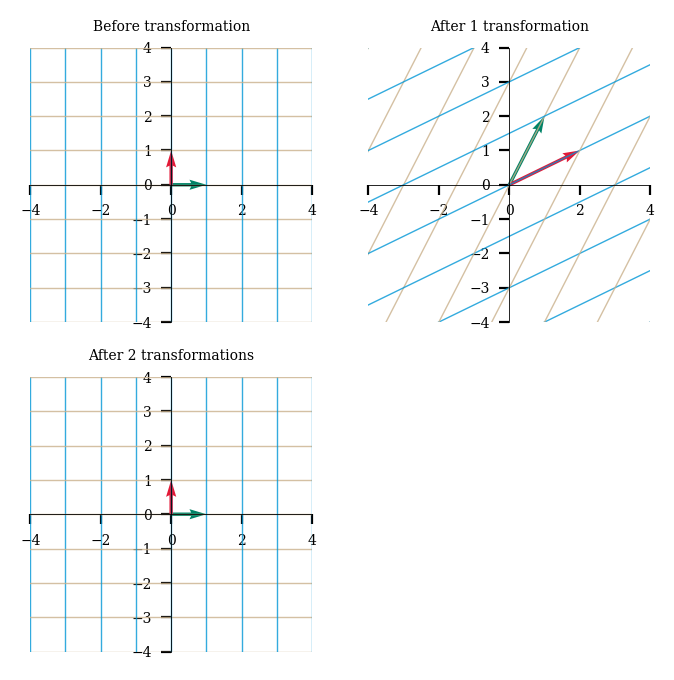

In [35]:
M = numpy.array([[1,2], [2,1]])
M_inv = inv(M)
# plot_linear_tranformation"s" Ìï®ÏàòÎäî Ï≤´Î≤àÏß∏ Ïù∏Ïûê, ÎëêÎ≤àÏß∏ Ïù∏ÏûêÎ•º Ï∞®Î°ÄÎåÄÎ°ú Ï†ÅÏö©ÏãúÏºúÏ§çÎãàÎã§.
plot_linear_transformations(M, M_inv)

> Ï¶â, $M^{-1}$ÏùÄ $M$Ïóê ÏùòÌï¥ linearly transformÎêú ÏßÅÏÑ†Îì§ÏùÑ, Ï†ÑÎ∂Ä ÏõêÎûò ÏúÑÏπòÎ°ú ÎêòÎèåÎ†§ ÎÜìÎäî linear transformationÏù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌï† Ïàò ÏûàÏäµÎãàÎã§. Í≤∞Î°†Ï†ÅÏúºÎ°ú $M^{-1}M$ÏùÄ $I$ (identity matrix)ÏôÄ Í∞ôÏùåÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.

### Exercise
> Matrix $B = \begin{bmatrix} 1 & 1 \\ 0 & -1 \end{bmatrix}$Ïóê ÎåÄÌï¥ $B$ÏôÄ $B^{-1}$Î•º plot_linear_transformationsÎ•º Ïù¥Ïö©Ìï¥ÏÑú plotÌïòÏãúÏò§. ÌäπÏù¥Ìïú Ï†êÏù¥ ÏûàÏùÑÍπåÏöî?

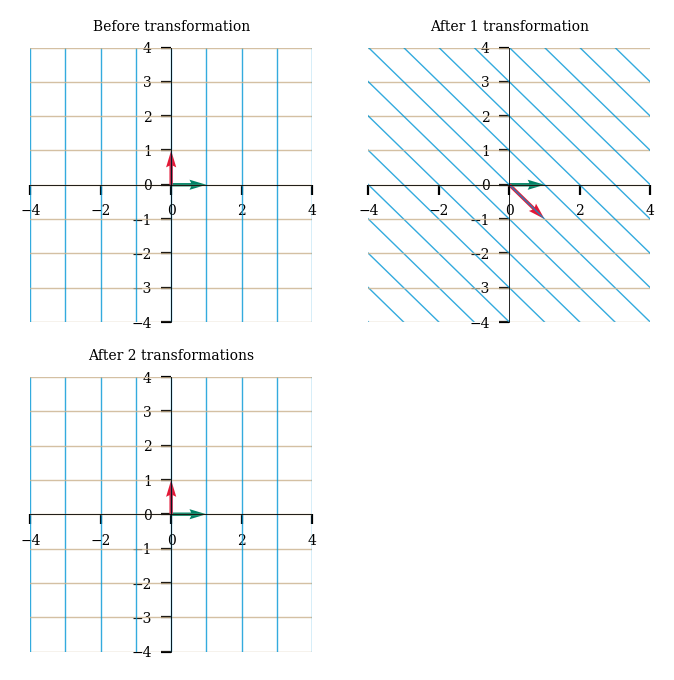

In [36]:
B = np.array([[1,1],[0,-1]])
B_inv = inv(B)

plot_linear_transformations(B, B_inv)

# B inverseÎäî BÏóê ÏùòÌï¥ linearly transformÎêú B transformation Ïù¥Ï†ÑÏúºÎ°ú ÎêòÎèåÎ†§ ÎÜìÎäî linear transformationÏù¥Í≥†, B@inv(B)Îäî ùêº(identity matrix)ÏôÄ Í∞ôÎã§.

# Reference

1. https://github.com/jclosure/EngComp4_landlinear